<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Dosyanın tam yolu
file_path = '/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv'

# CSV dosyasını oku
df = pd.read_csv(file_path)


In [ ]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape  # (satır sayısı, sütun sayısı)

(891, 12)

In [ ]:
df.describe() # Temel istatistiksel özet

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Eksik değerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri içeren sütunları filtreleyerek sadece eksik değerleri gösterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha düzenli görüntüleyelim
print("Eksik Değer Sayıları:\n")
print(missing_values)

Eksik Değer Sayıları:

Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# Eksik veri yüzdesini hesapla
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sadece eksik verisi olan sütunları gösterelim
missing_percentage = missing_percentage[missing_percentage > 0]

# Sonucu daha okunaklı hale getirelim
print("Eksik Değer Yüzdeleri (%):\n")
print(missing_percentage.round(2))

Eksik Değer Yüzdeleri (%):

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64


In [ ]:
df.sample(n=5) # veri setinden 5 rastgele satır seçm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.750,F38,Q
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.200,NaN,C
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.000,NaN,S


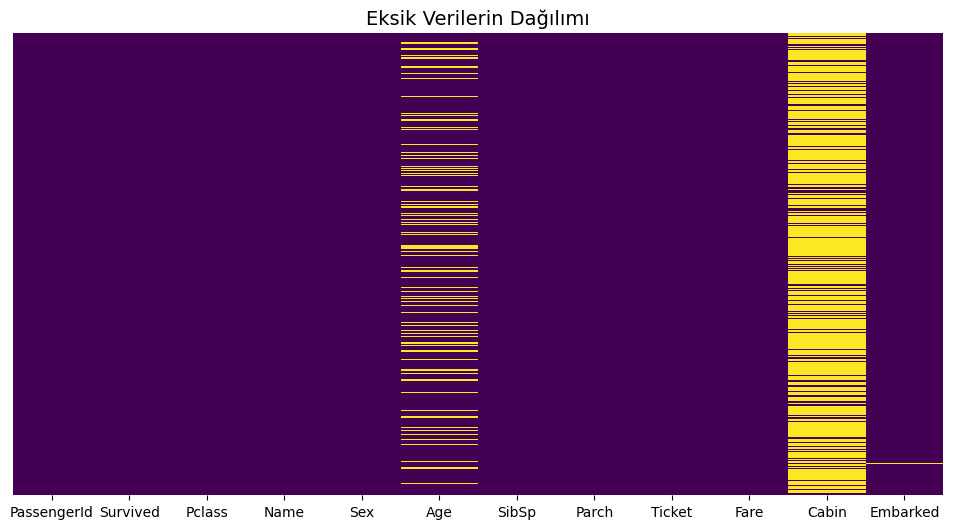

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Dağılımı", fontsize=14)
plt.show()

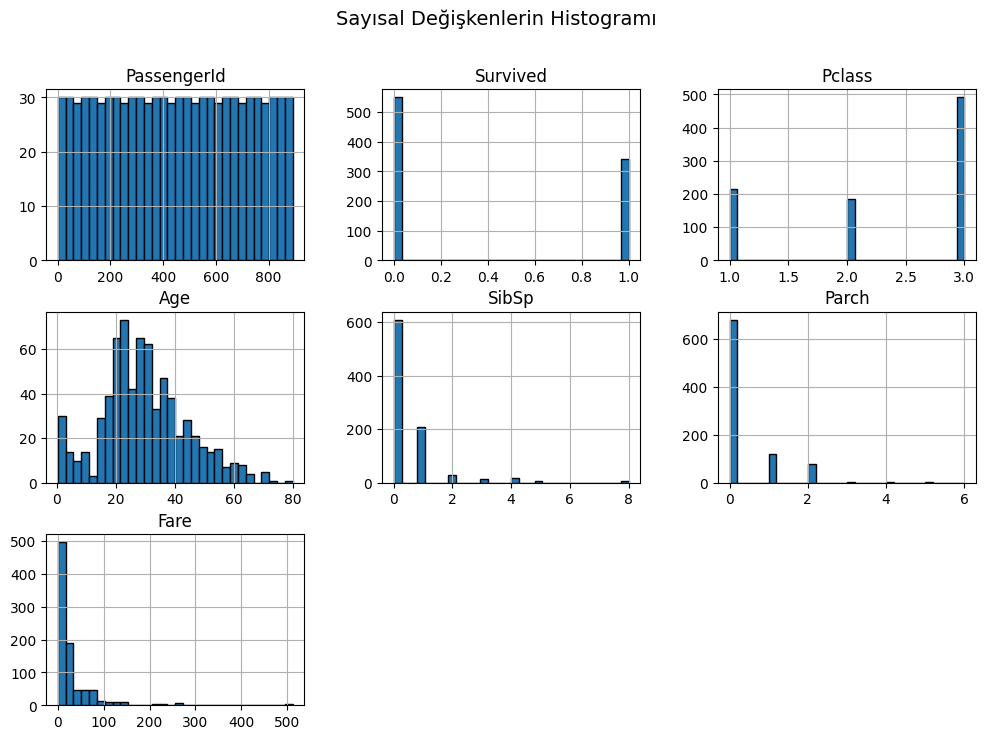

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Sayısal Değişkenlerin Histogramı", fontsize=14)
plt.show()

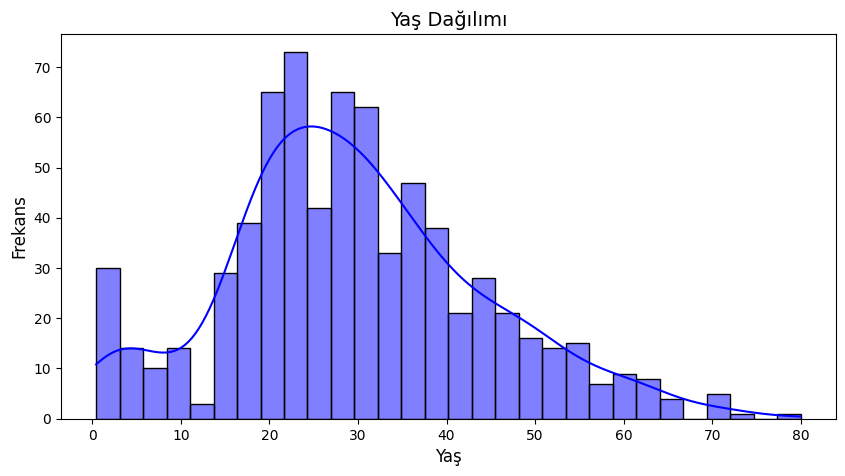

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Yaş Dağılımı", fontsize=14)
plt.xlabel("Yaş", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

<ipython-input-10-c39c4508af74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Survived"], palette="pastel")


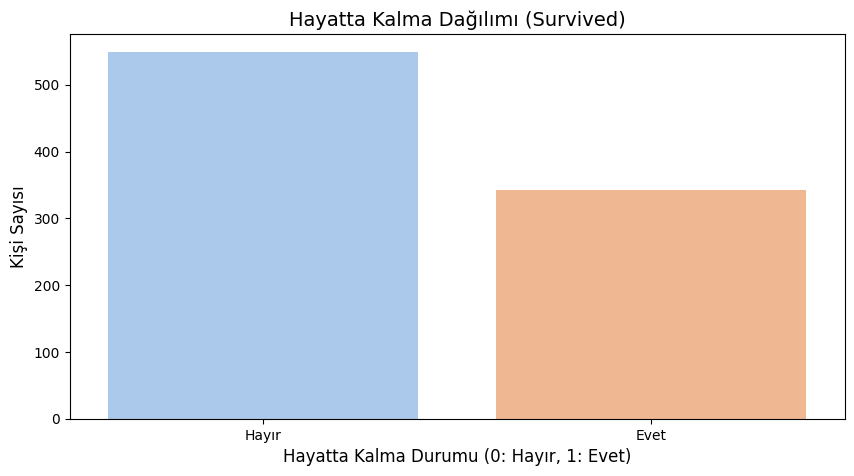

<ipython-input-10-c39c4508af74>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sex"], palette="muted")


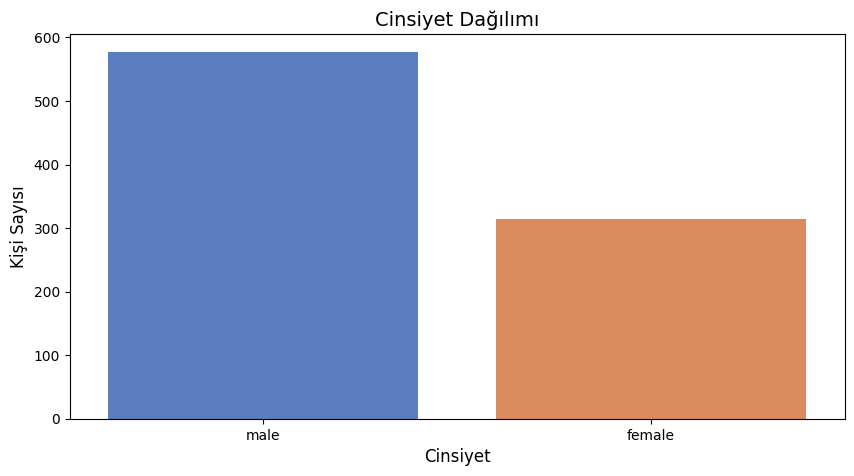

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Survived" sütununun dağılımını görselleştirme
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Survived"], palette="pastel")
plt.title("Hayatta Kalma Dağılımı (Survived)", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks([0, 1], ["Hayır", "Evet"])
plt.show()

# "Sex" sütununun dağılımını görselleştirme
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Sex"], palette="muted")
plt.title("Cinsiyet Dağılımı", fontsize=14)
plt.xlabel("Cinsiyet", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.show()

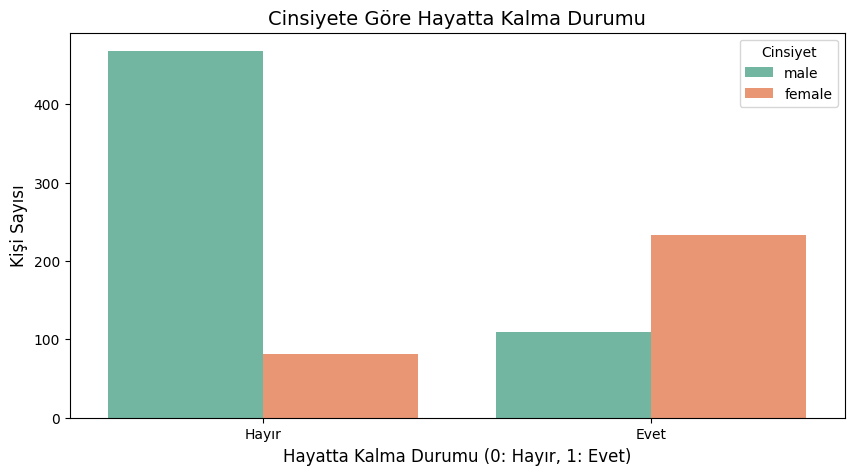

In [ ]:
# Cinsiyetin hayatta kalma durumuna etkisini görselleştirme
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Survived"], hue=df["Sex"], palette="Set2")

# Grafik başlık ve etiketleri
plt.title("Cinsiyete Göre Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks([0, 1], ["Hayır", "Evet"])
plt.legend(title="Cinsiyet")

# Grafiği göster
plt.show()

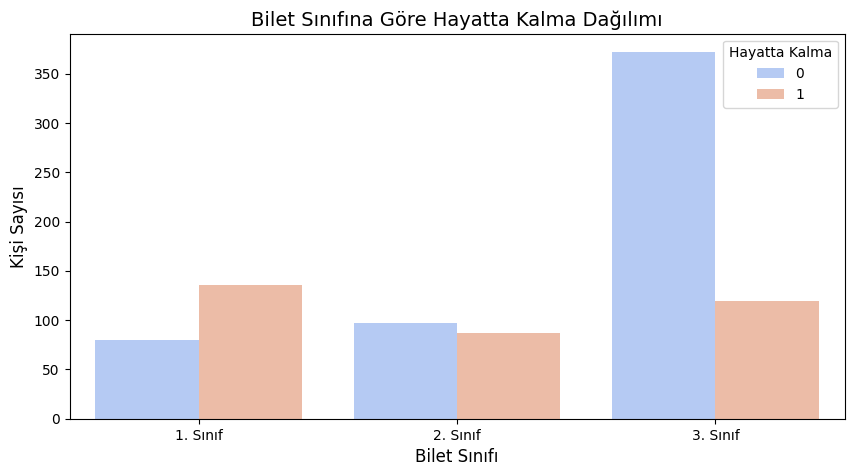

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Pclass"], hue=df["Survived"], palette="coolwarm")

plt.title("Bilet Sınıfına Göre Hayatta Kalma Dağılımı", fontsize=14)
plt.xlabel("Bilet Sınıfı", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks([0, 1, 2], ["1. Sınıf", "2. Sınıf", "3. Sınıf"])
plt.legend(title="Hayatta Kalma")
plt.show()

<ipython-input-18-98aed53ec4e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Survived"], y=df["SibSp"], palette="pastel")


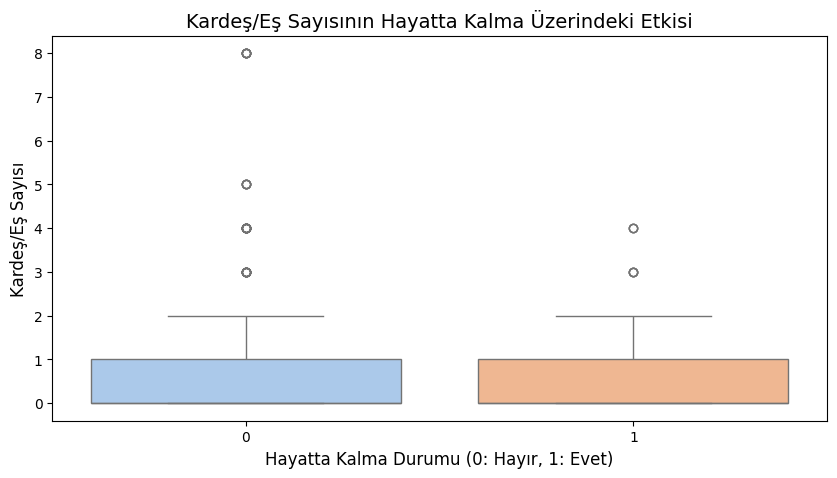

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Survived"], y=df["SibSp"], palette="pastel")

plt.title("Kardeş/Eş Sayısının Hayatta Kalma Üzerindeki Etkisi", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Kardeş/Eş Sayısı", fontsize=12)
plt.show()

<ipython-input-19-34cf5fb111c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")


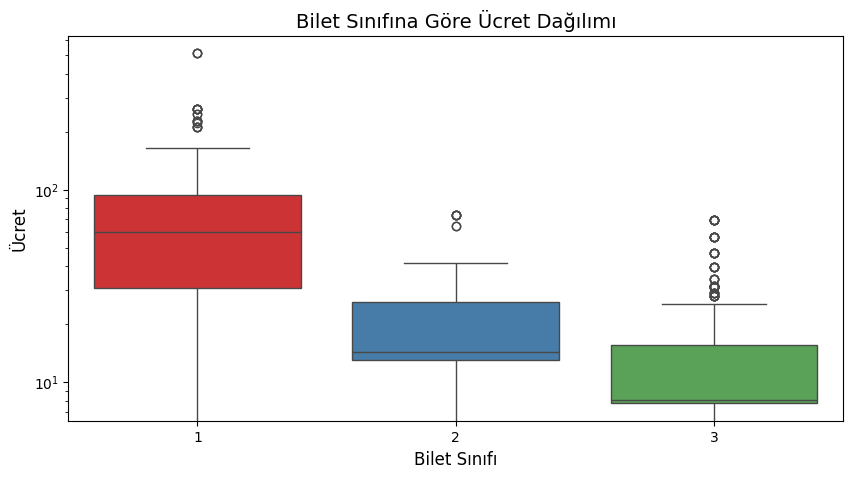

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")

plt.title("Bilet Sınıfına Göre Ücret Dağılımı", fontsize=14)
plt.xlabel("Bilet Sınıfı", fontsize=12)
plt.ylabel("Ücret", fontsize=12)
plt.yscale("log")  # Ücretler arasında büyük farklılıklar olduğu için log dönüşümü
plt.show()

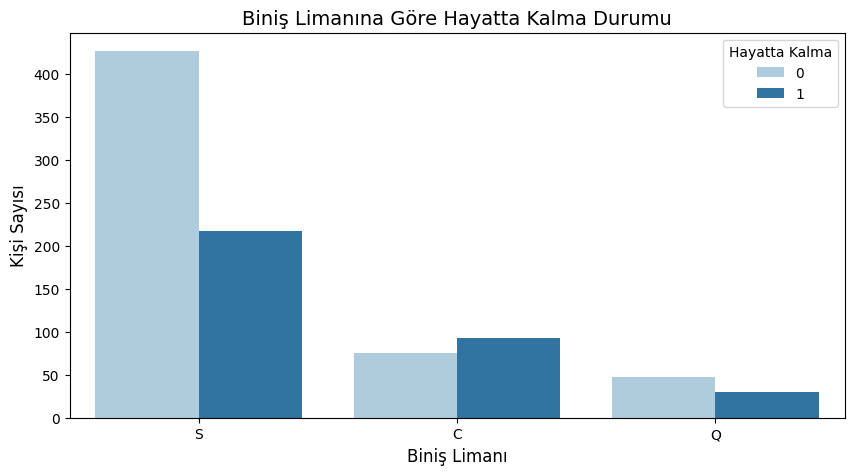

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Embarked"], hue=df["Survived"], palette="Paired")

plt.title("Biniş Limanına Göre Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Biniş Limanı", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.legend(title="Hayatta Kalma")
plt.show()